# Hierarchical Clustering

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
data=pd.read_csv(r"bank_transactions.csv")
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [12]:
data.shape

(20000, 9)

In [14]:
data.describe

<bound method NDFrame.describe of       TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0                T1   C5841053  10-01-1994          F   JAMSHEDPUR   
1                T2   C2142763  04-04-1957          M      JHAJJAR   
2                T3   C4417068  26-11-1996          F       MUMBAI   
3                T4   C5342380  14-09-1973          F       MUMBAI   
4                T5   C9031234  24-03-1988          F  NAVI MUMBAI   
...             ...        ...         ...        ...          ...   
19995        T19996   C2130963  09-08-1989          M       MUMBAI   
19996        T19997   C1214583  02-01-1987          M      KOLKATA   
19997        T19998   C4739783  11-02-1970          M       MUMBAI   
19998        T19999   C4532552  21-02-1993          M        DELHI   
19999        T20000   C6936463  27-08-1987          F     VADODARA   

       CustAccountBalance TransactionDate  TransactionTime  \
0                17819.05      02-08-2016           143207   
1

In [18]:
data.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                72
CustGender                 11
CustLocation                1
CustAccountBalance         27
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [24]:
# Convert object/string into Data Time

data['TransactionDate']=pd.to_datetime(data['TransactionDate'], format= '%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            20000 non-null  object        
 1   CustomerID               20000 non-null  object        
 2   CustomerDOB              19928 non-null  object        
 3   CustGender               19989 non-null  object        
 4   CustLocation             19999 non-null  object        
 5   CustAccountBalance       19973 non-null  float64       
 6   TransactionDate          20000 non-null  datetime64[ns]
 7   TransactionTime          20000 non-null  int64         
 8   TransactionAmount (INR)  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [26]:
data.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                72
CustGender                 11
CustLocation                1
CustAccountBalance         27
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [28]:
#Drop the  null values:
data=data.dropna()

In [30]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [32]:
data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [40]:
num_col=['CustAccountBalance', 'TransactionAmount (INR)']
numberical_data=data[num_col].copy()  # Changes in this wont affect  my original data

In [42]:
numberical_data.head()

,CustAccountBalance,TransactionAmount (INR)
0,17819.05,25.0
1,2270.69,27999.0
2,17874.44,459.0
3,866503.21,2060.0
4,6714.43,1762.5


In [48]:
# Scale the data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_feature=std.fit_transform(numberical_data)
scaled_feature

array([[-1.41824169e-01, -2.34306824e-01],
       [-1.63397398e-01,  3.65358538e+00],
       [-1.41747316e-01, -1.73988484e-01],
       ...,
       [-2.64242290e-03,  2.34758601e-01],
       [-1.48196907e-01, -1.68290208e-01],
       [ 3.62880099e-01, -2.00256148e-01]])

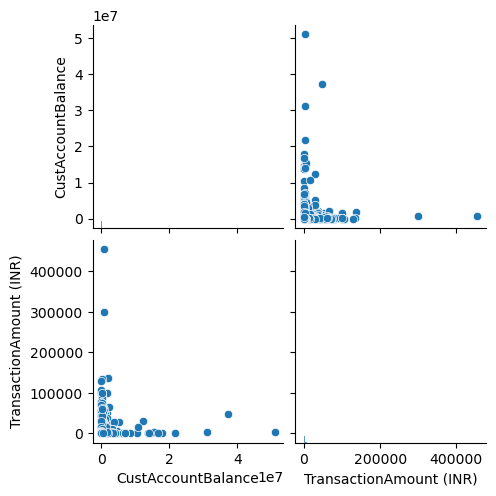

In [59]:
# Explortary Data
import matplotlib.pyplot as plt
sns.pairplot(data[num_col])
plt.show()

In [61]:
# Find optimal value of k
from sklearn .cluster import KMeans

In [81]:
wcss=[]
for k in range(1,11):
    kmeans =KMeans(n_clusters=k, init ='k-means++', random_state=42)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)

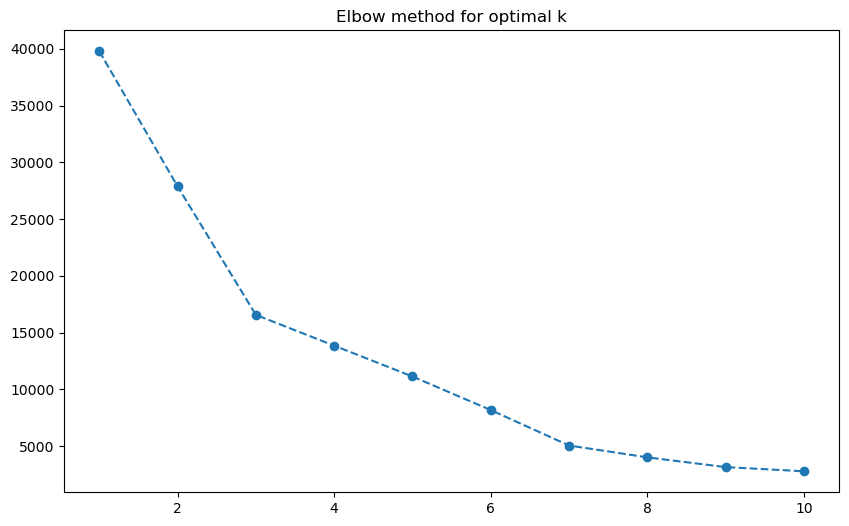

In [89]:
# PLot graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel=('No of Clusters(K)') 
plt.xlabel=('WCSS')
plt.title('Elbow method for optimal k')
plt.show()

In [93]:
print('Optimal value of K: ', 3)
optimal_k=3

Optimal value of K:  3


In [101]:
kmeans=KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_feature)

KMeans(n_clusters=3, random_state=42)

In [103]:
data['Cluster']=kmeans.predict(scaled_feature)

In [105]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Cluster
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0,0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,0


In [107]:
data['Cluster'].value_counts()

Cluster
0    19724
1      148
2       17
Name: count, dtype: int64

In [111]:
# Do EDA on each cluster


In [116]:
#Homework:
#Drop TransactionID, TransactionDate
#Create new col age using CustomerDOB
#Convert category col into dummy varible
#Standard Scaling